#### 1. Setup and Imports

In [1]:
import pandas as pd
import numpy as np
import sys
import os

# Set the project root directory manually
project_root = r"D:\tenx\fraud_detection_w8"
sys.path.append(os.path.join(project_root, 'src'))

from data_preprocessing import load_data, clean_ecommerce_data, clean_creditcard_data, \
                               setup_ecommerce_preprocessor, setup_creditcard_preprocessor
from eda import perform_eda
from feature_engineering import merge_ip_to_country, engineer_ecommerce_features

print("Modules loaded successfully.")


Modules loaded successfully.


In [2]:
RAW_DATA_PATH = r"D:\tenx\fraud_detection_w8\Data"
PROCESSED_DATA_PATH = r"D:\tenx\fraud_detection_w8\Data\processed"

In [3]:
os.makedirs(PROCESSED_DATA_PATH, exist_ok=True)

fraud_data_path = os.path.join(RAW_DATA_PATH, 'Fraud_Data.csv')
ip_country_data_path = os.path.join(RAW_DATA_PATH, 'IpAddress_to_Country.csv')
creditcard_data_path = os.path.join(RAW_DATA_PATH, 'creditcard.csv')

#### 2. Load Datasets

In [4]:
print("\n--- Step 2: Loading Datasets ---")
df_fraud, df_ip_country, df_creditcard = load_data(
    fraud_data_path, ip_country_data_path, creditcard_data_path
)

# Display initial info
print("\nInitial info for Fraud_Data.csv:")
df_fraud.info()
print("\nInitial info for creditcard.csv:")
df_creditcard.info()
print("\nInitial info for IpAddress_to_Country.csv:")
df_ip_country.info()


--- Step 2: Loading Datasets ---
Datasets loaded successfully.

Initial info for Fraud_Data.csv:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151112 entries, 0 to 151111
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   user_id         151112 non-null  int64  
 1   signup_time     151112 non-null  object 
 2   purchase_time   151112 non-null  object 
 3   purchase_value  151112 non-null  int64  
 4   device_id       151112 non-null  object 
 5   source          151112 non-null  object 
 6   browser         151112 non-null  object 
 7   sex             151112 non-null  object 
 8   age             151112 non-null  int64  
 9   ip_address      151112 non-null  float64
 10  class           151112 non-null  int64  
dtypes: float64(1), int64(4), object(6)
memory usage: 12.7+ MB

Initial info for creditcard.csv:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (tota

##### 3. Data Cleaning and Preprocessing

In [5]:
print("\n--- Step 3.1: Cleaning E-commerce Fraud Data ---")
df_fraud_cleaned = clean_ecommerce_data(df_fraud.copy()) 
print("\n--- Step 3.2: Cleaning Credit Card Fraud Data ---")
df_creditcard_cleaned = clean_creditcard_data(df_creditcard.copy())


--- Step 3.1: Cleaning E-commerce Fraud Data ---
E-commerce data before dropping duplicates: (151112, 11)
E-commerce data after dropping duplicates: (151112, 11)
Data types for e-commerce data updated.

--- Step 3.2: Cleaning Credit Card Fraud Data ---
Credit card data before dropping duplicates: (284807, 31)
Credit card data after dropping duplicates: (283726, 31)



#### 4. Exploratory Data Analysis (EDA)


--- Step 4.1: EDA for E-commerce Fraud Data ---

--- EDA for Cleaned E-commerce Fraud Data (Pre-Merge) ---

Info for Cleaned E-commerce Fraud Data (Pre-Merge):
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151112 entries, 0 to 151111
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   user_id         151112 non-null  int64         
 1   signup_time     151112 non-null  datetime64[ns]
 2   purchase_time   151112 non-null  datetime64[ns]
 3   purchase_value  151112 non-null  int64         
 4   device_id       151112 non-null  object        
 5   source          151112 non-null  object        
 6   browser         151112 non-null  object        
 7   sex             151112 non-null  object        
 8   age             151112 non-null  int64         
 9   ip_address      151112 non-null  float64       
 10  class           151112 non-null  int64         
dtypes: datetime64[ns](2), float64(1), 

D:\tenx\fraud_detection_w8\src\eda.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=class_counts.index, y=class_counts.values, palette=['#1f77b4', '#2ca02c'])


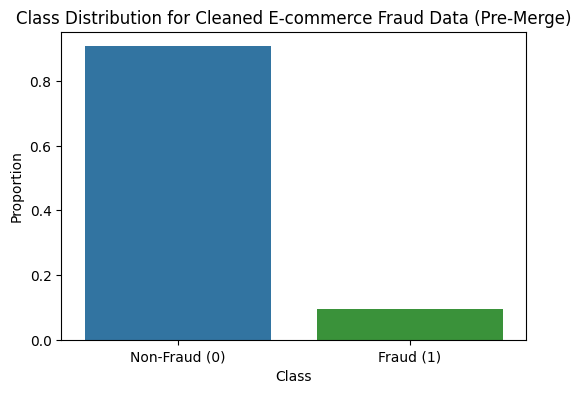


--- Additional EDA for E-commerce Fraud Data ---


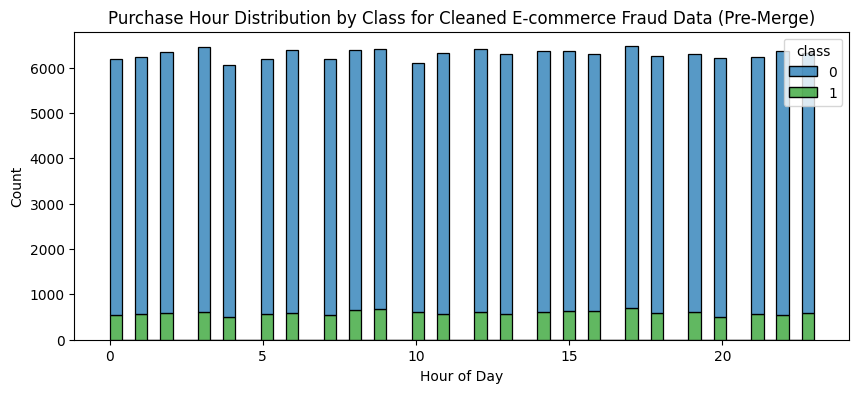

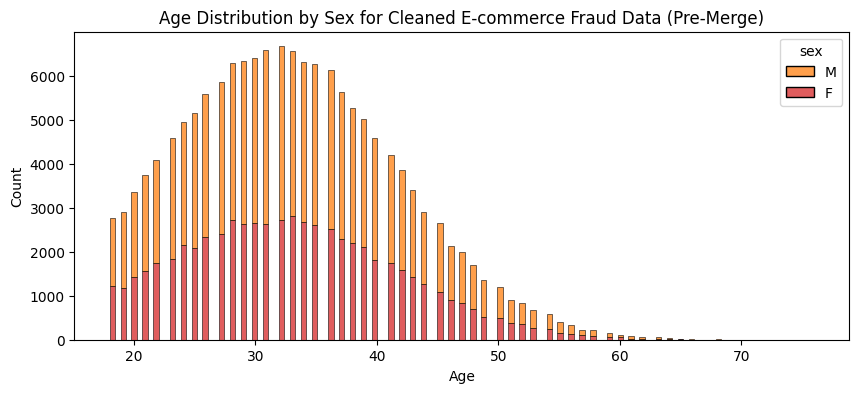

D:\tenx\fraud_detection_w8\src\eda.py:69: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target_col, y='purchase_value', data=df, palette=['#1f77b4', '#2ca02c'])


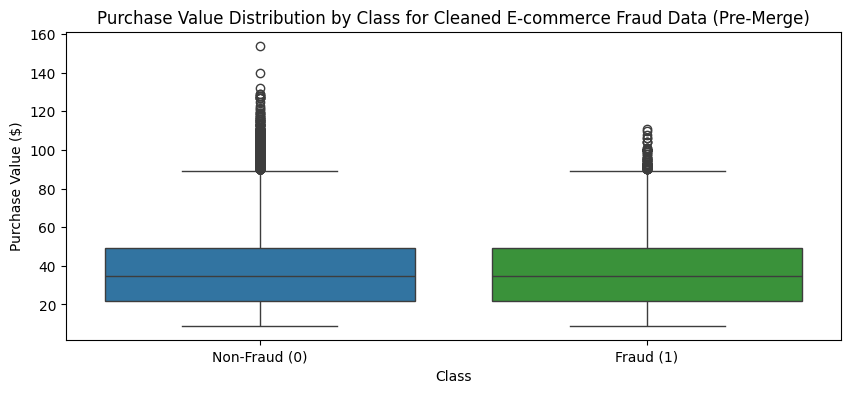


--- Step 4.2: EDA for Credit Card Fraud Data ---

--- EDA for Cleaned Credit Card Fraud Data ---

Info for Cleaned Credit Card Fraud Data:
<class 'pandas.core.frame.DataFrame'>
Index: 283726 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    283726 non-null  float64
 1   V1      283726 non-null  float64
 2   V2      283726 non-null  float64
 3   V3      283726 non-null  float64
 4   V4      283726 non-null  float64
 5   V5      283726 non-null  float64
 6   V6      283726 non-null  float64
 7   V7      283726 non-null  float64
 8   V8      283726 non-null  float64
 9   V9      283726 non-null  float64
 10  V10     283726 non-null  float64
 11  V11     283726 non-null  float64
 12  V12     283726 non-null  float64
 13  V13     283726 non-null  float64
 14  V14     283726 non-null  float64
 15  V15     283726 non-null  float64
 16  V16     283726 non-null  float64
 17  V17     283726 non-null  fl

D:\tenx\fraud_detection_w8\src\eda.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=class_counts.index, y=class_counts.values, palette=['#1f77b4', '#2ca02c'])


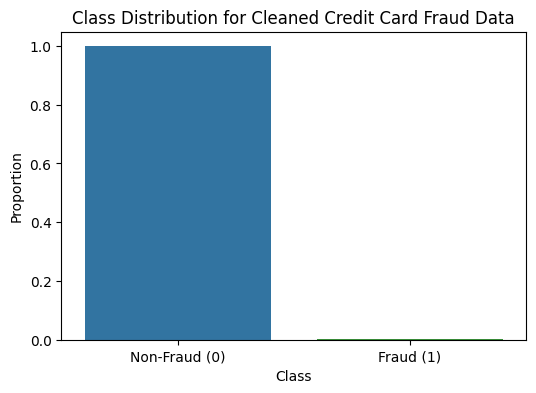


--- Additional EDA for Credit Card Fraud Data ---


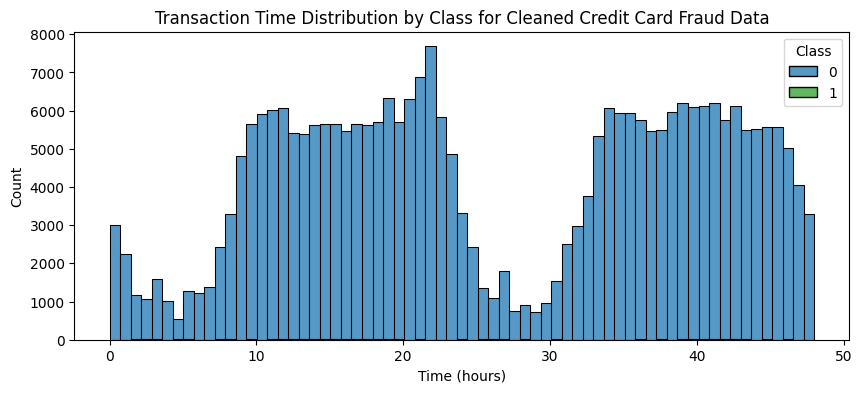

D:\tenx\fraud_detection_w8\src\eda.py:90: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Class', y='Amount', data=df, palette=['#1f77b4', '#2ca02c'])


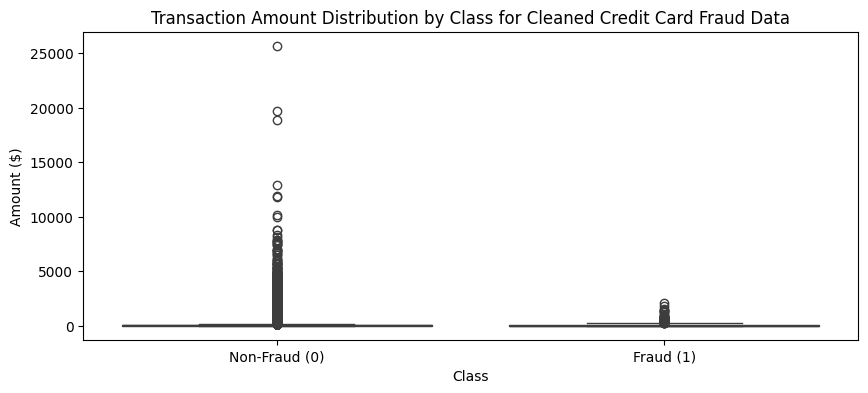

In [6]:
# Example usage in main script
print("\n--- Step 4.1: EDA for E-commerce Fraud Data ---")
perform_eda(df_fraud_cleaned, title="Cleaned E-commerce Fraud Data (Pre-Merge)")

print("\n--- Step 4.2: EDA for Credit Card Fraud Data ---")
perform_eda(df_creditcard_cleaned, title="Cleaned Credit Card Fraud Data")


##### 5. Feature Engineering

In [8]:
# Merge IP address to country
print("\n--- Step 5.1: Merging IP Address to Country for E-commerce Data ---")
df_fraud_merged = merge_ip_to_country(df_fraud_cleaned.copy(), df_ip_country.copy())

# Verify merge
print("\nE-commerce data after IP-to-Country merge (head):")
print(df_fraud_merged[['ip_address', 'ip_address_int', 'country']].head())
print("\nCountry distribution (top 10) after merge:")
print(df_fraud_merged['country'].value_counts().head(10))

# Engineer time-based and transaction pattern features
print("\n--- Step 5.2: Engineering Features for E-commerce Data ---")
df_fraud_engineered = engineer_ecommerce_features(df_fraud_merged.copy())

# Display engineered features
print("\nE-commerce data after feature engineering (head):")
print(df_fraud_engineered[['purchase_time', 'time_since_signup', 'hour_of_day', 'day_of_week',
                           'user_transaction_count', 'device_transaction_count', 'ip_transaction_count',
                           'time_diff_user', 'time_diff_device', 'time_diff_ip', 'class']].head())




--- Step 5.1: Merging IP Address to Country for E-commerce Data ---

Mapping IP addresses to countries for e-commerce data...
IP to Country mapping complete.
     ip_address        country  class
0  7.327584e+08          Japan      0
1  3.503114e+08  United States      0
2  2.621474e+09  United States      1
3  3.840542e+09        Unknown      0
4  4.155831e+08  United States      0

E-commerce data after IP-to-Country merge (head):
     ip_address  ip_address_int        country
0  7.327584e+08       732758368          Japan
1  3.503114e+08       350311387  United States
2  2.621474e+09      2621473820  United States
3  3.840542e+09      3840542443        Unknown
4  4.155831e+08       415583117  United States

Country distribution (top 10) after merge:
country
United States        58049
Unknown              21966
China                12038
Japan                 7306
United Kingdom        4490
Korea Republic of     4162
Germany               3646
France                3161
Canada      

#### 6. Data Transformation Setup (Preprocessors)

In [9]:
print("\n--- Step 6.1: Setting up Preprocessor for E-commerce Data ---")
# Drop columns not needed for modeling and the target variable
X_fraud_pre_transform = df_fraud_engineered.drop(columns=[
    'user_id', 'signup_time', 'purchase_time', 'device_id', 'ip_address', 'ip_address_int', 'class'
])
y_fraud = df_fraud_engineered['class']

ecommerce_preprocessor, ecommerce_cat_features, ecommerce_num_features = setup_ecommerce_preprocessor(X_fraud_pre_transform)

# Example of applying the preprocessor (optional for Task 1, but good for verification)
print("\nApplying E-commerce preprocessor to a sample of data (for verification):")
try:
    X_fraud_processed_sample = ecommerce_preprocessor.fit_transform(X_fraud_pre_transform.head())
    print(f"Shape of processed E-commerce sample data: {X_fraud_processed_sample.shape}")
    # Note: X_fraud_processed_sample is a sparse matrix if OneHotEncoder is used.
except Exception as e:
    print(f"Error during sample preprocessing: {e}")


# 6.2 Credit Card Data Transformation Setup
print("\n--- Step 6.2: Setting up Preprocessor for Credit Card Data ---")
X_credit_pre_transform = df_creditcard_cleaned.drop(columns=['Class'])
y_credit = df_creditcard_cleaned['Class']

creditcard_preprocessor, creditcard_num_features = setup_creditcard_preprocessor(X_credit_pre_transform)

# Example of applying the preprocessor (optional for Task 1, but good for verification)
print("\nApplying Credit Card preprocessor to a sample of data (for verification):")
try:
    X_credit_processed_sample = creditcard_preprocessor.fit_transform(X_credit_pre_transform.head())
    print(f"Shape of processed Credit Card sample data: {X_credit_processed_sample.shape}")
except Exception as e:
    print(f"Error during sample preprocessing: {e}")

print("\n--- Task 1: Data Analysis and Preprocessing Completed ---")


--- Step 6.1: Setting up Preprocessor for E-commerce Data ---
E-commerce data preprocessing pipeline setup complete.

Applying E-commerce preprocessor to a sample of data (for verification):
Shape of processed E-commerce sample data: (5, 24)

--- Step 6.2: Setting up Preprocessor for Credit Card Data ---
Credit card data preprocessing pipeline setup complete.

Applying Credit Card preprocessor to a sample of data (for verification):
Shape of processed Credit Card sample data: (5, 31)

--- Task 1: Data Analysis and Preprocessing Completed ---


In [10]:

# Save processed data (optional, but good practice for next tasks)
df_fraud_engineered.to_csv(os.path.join(PROCESSED_DATA_PATH, 'fraud_data_processed.csv'), index=False)
df_creditcard_cleaned.to_csv(os.path.join(PROCESSED_DATA_PATH, 'creditcard_data_processed.csv'), index=False)
print(f"\nProcessed data saved to {PROCESSED_DATA_PATH}")


Processed data saved to D:\tenx\fraud_detection_w8\Data\processed
